In [1]:
import numpy as np
from math import exp
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Scoring Function
def score(TrainData,TestData,L):
    print("Scoring the data")
    scored_trainData = np.zeros(L)
    scored_testData = np.zeros(L)
    a1 = 3.2
    a2 = 10
    for i in range(L):
        u = np.sum(np.absolute(TrainData[0:i+1]),dtype=np.float64)
        u = u/L
        d = 0
        for j in range(i+1):
            val = np.square((np.absolute(TrainData[j]) - u))
            d = np.add(val,d)
        d = d/L
        scored_trainData[i] = pow((1 +exp((TrainData[i]/(u+3*d)) - a1)),-1)
        val = (TrainData[i] - TestData[i])/(a1*(u+3*d))
        scored_testData[i] = pow((1 +exp((TrainData[i]/(u+3*d)) - a1) + val),-1)
    return scored_trainData,scored_testData    

In [3]:
#Loading Data files
file1 = "DTW_bw_AE_correct.csv"
file2 = "DTW_bw_AE_incorrect.csv"
filepath_train = "../Performance-Metric/Data/" + file1
filepath_test = "../Performance-Metric/Data/" + file2
Train_Data = np.loadtxt(filepath_train, delimiter = ',')
Test_Data = np.loadtxt(filepath_test, delimiter = ',')
L = Train_Data.shape[0]

In [4]:
#Calculating the score
Trainscore,Testscore = score(Train_Data,Test_Data,L)
print(Testscore.shape)
print(Trainscore.shape)

Scoring the data
(90,)
(90,)


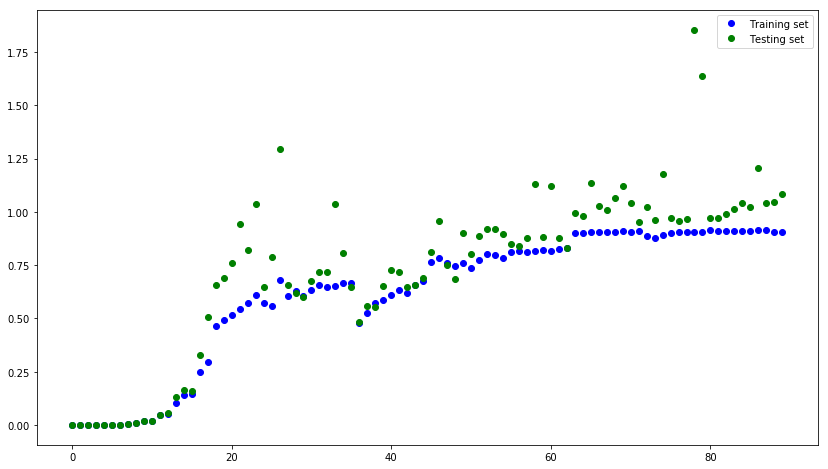

In [5]:
#Plotting 
plt.figure(figsize = (14,8))
plt.plot(Trainscore,"bo",label="Training set")
plt.plot(Testscore,"go",label="Testing set")
plt.legend()
plt.show()

In [7]:
#Saving the data
os.chdir("Data")
np.savetxt("f1_"+file1, Trainscore,delimiter=',')
np.savetxt("f1_" +file2, Testscore,delimiter=',')


FileNotFoundError: [Errno 2] No such file or directory: 'Data'